$\newcommand{\O}[1]{\mathcal{O}({#1})}$

# Modificación en árboles binarios de búsqueda (ABB)

### Inserción
- Primero se debe buscar el nodo antes de insertar
- Si el algoritmo de búsqueda no lo encuentra, entonces lo debemos insertar en el último lugar que recorrimos. De esta forma, si volvemos a la raíz y ubscamos nuevamente el mismo elemento, lo encontraremos en la misma posición que lo insertamos.

### Eliminación
- En la práctica, es poco frecuente, ya que la capacidad de almacenamiento es muy grande.
- En todo caso, si queremos eliminarlo, debemos primero buscarlo. Si no lo encuentro, está garantizado que ese nodo con la clave suministrada **no existe**.

Tenemos dos casos:
- Nodo hoja: se elimina simplemente
- Si tiene hijos, es un caso más interesante:
    - Si tiene un solo hijo, el hijo (y el árbol que cuelga desde él) toma su posición: basta reemplazar en la posición del nodo saliente por su único hijo.
    - Si tiene dos hijos, hay que reemplazar el nodo saliente por un nodo conveniente. Acá nuevamente tenemos dos opciones:
        - El mayor hijo que está en el árbol izquierdo: Como peor caso tiene un hijo, mejor caso es una hoja. Si tuviera dos hijos, en particular, su hijo derecho sería mayor, por lo que el actual no era el mayor del árbol izquierdo.
        - El menor hijo que está en el árbol derecho: Como peor caso tiene un hijo, mejor caso es una hoja. Si tuviera dos hijos, en particular, su hijo izquierdo sería menor, por lo que el actual no era el menor del árbol derecho.
        
        Esta operación se denomina "Reemplazo por sucesor o antecesor".
        
        Buscar el sucesor de la raíz es equivalente (en los casos normales) a encontrar el menor del subárbol derecho, y el antecesor de la raíz es encontrar el mayor del subárbol izquierdo. Si no tiene el hijo necesario, el sucesor/antecesor de un nodo está probablemente en niveles más altos. No obstante, para la eliminación no es necesario encontrar el sucesor/antecesor, sino se elimina de forma simple.
        Dependiendo del nodo buscado, antecesor o sucesor, se elimina (si es hoja se saca, o si tiene un hijo, ese toma su lugar) de la posición anterior y se ubica en la posición del nodo saliente, tomando como suyos los hijos del saliente.

```C
min(A):
    if A.left:
        return min(A.left)
    return A

succesor(A):
    if A.right != empty:
        return min(A.right)
    return empty

delete(A, k):
    D = search(A, k)
    if D is leaf:
        D = empty  // se elimina
    else if D has only one child H:
        D = C
    else:
        R = successor(D)  // O antecesor
        D = R
        delete(A, R)  // se elimina recursivamente
    
```

## Complejidad de las operaciones

- Inserción y búsqueda: $\O{H}$, con $H$ la altura del árbol. Eso es lo que debo recorrer, haciendo una comparación por nivel. La altura de un ABB balanceado está acotada por el $\log_2 n$, pero para árboles desbalanceados esto puede ser hasta $\O{n}$. 
- Eliminación: primero debemos buscar $\rightarrow \O{H}$. Si es hoja o tiene 1 hijo, la complejidad de dicha operación es $\O{1}$. Si tiene dos hijos, debemos encontrar el sucesor del nodo a eliminar. Esto debe recorrer el subárbol que está a su derecha y encontrar el menor nodo. Ahí tendremos que hacer hasta $\O{H}$ operaciones, ya que tenemos que hacer una búsqueda. Finalmente la eliminación del sucesor también es $\O{1}$. Luego, la eliminación es, en su caso más general, $\O{H}$.


## Balanceo de árboles

Si sabemos que tendremos que hacer muchas operaciones en un árbol, querremos limitar su altura, ya que las operaciones anteriores son lineales en H. Idealmente, queremos que la altura H sea lo más próxima al logaritmo del número de nodos.

Partiremos desde un árbol básico balanceado (vacío o de un nodo). Luego, todas las operaciones que modifiquen al árbol deberán preocuparse de dejarlo balanceado.

Si el balanceo tarda más tiempo que $\O{\log n}$, no tiene sentido rebalancear. La forma gráfica de un árbol es un mal indicador del grado de balanceo de un árbol. A veces se puede dar el caso que los subárboles izquierdo y derecho no tienen la misma altura, pero si cada uno está balanceado, ya no es tanto problema. 

## Balance AVL

Un ABB está `AVL-balanceado` si:
 - Las alturas de los hijos, parados en la raíz, difieren en no más que 1
 - Cada hijo a su vez está `AVL-balanceado`
Se puede demostrar que un árbol AVL acota a su altura $H \in \O{\log n}$

Si la configuración del árbol luego de una inserción, deja al subárbol derecho más grande en la parte exterior (ramas más externas) del árbol, se puede rebalancear con una rotación. 
 

## Altura media de un árbol binario, construido de forma aleatoria

In [30]:
import random
import matplotlib.pyplot as plt
class Tree:
    def __init__(self, value):
        self.root = value
        self.left = None
        self.right = None
        self.max_height = 1
    def insert(self, node):
        if node > self.root:
            if self.right:
                self.right.insert(node)
            else:
                self.right = Tree(node)
        else:
            if self.left:
                self.left.insert(node)
            else:
                self.left = Tree(node)
        right_height = 0
        left_height = 0
        if self.right:
            right_height = self.right.max_height
        if self.left:
            left_height = self.left.max_height

        self.max_height = max(right_height, left_height) + 1

def average_max_height(array_len):
    if array_len == 0:
        return 0
    trials = 10000
    running_height = 0
    for i in range(trials):
        array = list(range(array_len))
        random.shuffle(array)
        tree = Tree(array[0])
        for j in array[1:]:
            tree.insert(j)
        running_height += tree.max_height
    return running_height/trials

results = [average_max_height(int(1.3**i)) for i in range(5,30)]  

In [43]:
print(results)

[2.6635, 3.3306, 4.2719, 5.0154, 5.639, 6.3973, 7.2197, 8.1778, 9.0555, 9.961, 10.8943, 11.7926, 12.7329, 13.689, 14.6361, 15.6448, 16.6473, 17.6288, 18.6337, 19.6412, 20.653, 21.689, 22.7245, 23.7899, 24.8044]


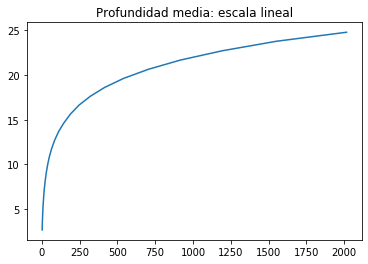

In [40]:
plt.title("Profundidad media: escala lineal")
plt.plot([int(1.3**i) for i in range(5,30)],results)

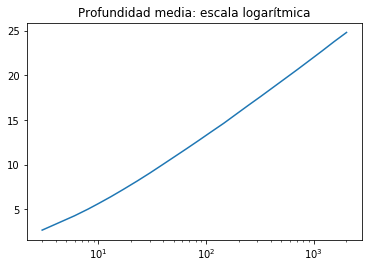

In [41]:
plt.xscale("log")
plt.title("Profundidad media: escala logarítmica")
plt.plot([int(1.3**i) for i in range(5,30)],results)